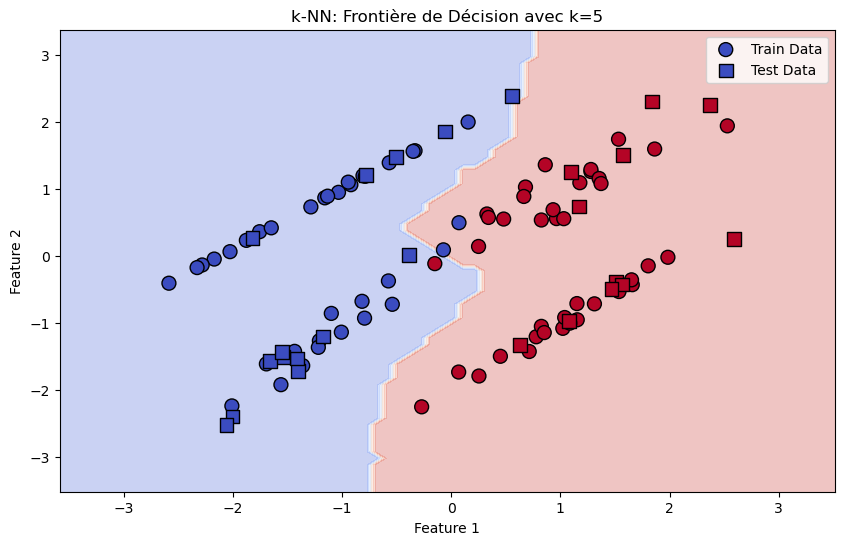

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

# Générer des données factices pour la classification (100 échantillons, 2 caractéristiques)
# Ajuster n_informative pour ne pas dépasser n_features
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)

# Division des données en jeu d'entraînement et jeu de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Créer le modèle k-NN avec k=5
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Création d'une grille pour afficher la frontière de décision
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Prédire les labels pour chaque point de la grille
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Tracer la frontière de décision
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Tracer les points de données d'entraînement
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=100, cmap=plt.cm.coolwarm, marker='o', label="Train Data")

# Tracer les points de données de test
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', s=100, cmap=plt.cm.coolwarm, marker='s', label="Test Data")

# Ajouter des labels et une légende
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("k-NN: Frontière de Décision avec k=5")
plt.legend()
plt.show()
